In [1]:
import nltk
import numpy as np
import random
import dataloader as dl
from collections import defaultdict
import onlyLoad as ol
import pickle
from io import StringIO
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
train = ol.DataLoad("./data/all.pkl")


In [58]:
with open('data/embedding_dict.pkl', 'rb') as f:
    embedding_dict = pickle.load(f)

In [24]:
embedding_dict['the'].shape

(300,)

In [3]:
def pooling(sentence):
  average = np.zeros((300))
  for word in sentence:
    average += word
  return average / len(sentence)

In [4]:
pooled = defaultdict(list)
for key in train.videoIDs:
    for sent in train.embeddings[key]:
        
        pooled[key].append(pooling(sent))
        
     

In [5]:
for key in train.videoIDs:
    print(key)
    break

p4IeTRNcxc4


In [6]:
for key in train.videoIDs:

    for seg in train.facet[key]:
        average = np.mean(seg, axis=0)
        if average.shape != (35,):
            print(average.shape)
        
        

In [7]:
for key in train.videoIDs:
    print((train.facet[key][0].shape))
    #print(len(train.pooled[key][0].shape))
    break

(27, 35)


In [4]:
def delete(X, worddict):
    new_embedding = defaultdict(list)
    raw = defaultdict(list)
    for key in X.ids:
        
        
        for sent in  X.raw_sentences[key]:
            sentsplit = np.array(sent.split())
            leng = sentsplit.shape[0]
            #print(len(sentsplit))
            perc = leng//10
            rand = np.arange(leng)
            #print(leng, rand[-1])
            np.random.shuffle(rand)
            
            rand = rand[:(leng - perc)]
            rand.sort()
            new_sentence = np.array([x for x in sentsplit[rand[:]]])
            new_sent_embed = np.zeros((leng-perc, 300))
            for word in enumerate(new_sentence):
                #print(word[0], word[1])
                new_sent_embed[word[0]] = worddict[new_sentence[word[0]]]
                
            raw[key].append(new_sentence)
            new_embedding[key].append(new_sent_embed)
                   
        
        
    
    return raw, new_embedding
    
    





In [5]:
r1, e1 = delete(train, embedding_dict)
for key in r1:
    #print(d1[key1][0].shape)
    print(r1[key][0])
    print(e1[key][0][0])
    break



['writer' 'sp' 'i' 'that' 'a' 'writer' 'is' 'somebody' 'who' 'has' 'an'
 'command' 'of' 'mechanics' 'sp' 'of' 'the' 'english' 'language' 'sp']
[ 1.6844e-01  1.2176e-01 -2.5024e-01  5.5969e-01 -1.9715e-02  6.6947e-01
  3.7939e-01 -5.0048e-01 -8.7503e-02  2.8035e+00  2.3403e-01  1.4822e-01
 -7.2011e-01 -7.1406e-02 -4.8008e-02 -2.4702e-01  1.1762e-01 -6.3486e-02
  6.7035e-02  3.3891e-03  1.9744e-01  6.5556e-02 -1.8524e-01 -4.8428e-01
  1.4717e-01  2.3158e-02 -1.4227e-01  6.3032e-02  5.9859e-02 -1.0234e-01
 -1.2618e-01  9.7889e-02 -2.3678e-01 -1.5774e-01  7.8854e-02  4.6456e-01
  2.0640e-01 -1.6612e-01 -2.4889e-01 -3.4623e-01  7.4001e-01  3.8695e-01
 -4.1745e-01 -5.0991e-01  1.4206e-01 -5.2216e-01  4.8729e-01 -7.6383e-03
  6.6892e-01 -3.9855e-02  5.2008e-01 -2.9380e-01  9.5236e-02 -4.1431e-02
 -6.9168e-02 -3.4786e-01  1.0822e-01 -9.6592e-02  5.1035e-01 -4.9819e-01
 -3.5120e-01 -5.0444e-01  4.6296e-01  4.7811e-01 -6.1124e-02 -4.7242e-01
  3.6175e-01 -4.5132e-02  1.6916e-01  5.2695e-01 -5.11

In [23]:
1 in [1,2,3]

True

In [168]:
def replace(X, worddict, method = "random"):
    new_embedding = defaultdict(list)
    raw = defaultdict(list)
    wordlist = np.array(list(worddict.keys()))
    
    
    
    for key in X.ids:
        
        
        for sent in  X.raw_sentences[key]:
            sentsplit = sent.split()
            leng = len(sentsplit)
            perc = leng//10
            rand = np.arange(leng)
            np.random.shuffle(rand)
            
            rand = rand[(leng - perc):]
            rand.sort()
            
            new_sent_embed = np.zeros((leng, 300))
            for word in enumerate(sentsplit):
                
                if word[0] in rand:
                    if method == "random":
                        np.random.shuffle(wordlist)
                        new_sent_embed[word[0]] = worddict[wordlist[word[0]]]
                        
                        sentsplit[word[0]] = wordlist[word[0]]
                    
                    else: 
                        new_sent_embed[word[0]] = worddict[method]
                        sentsplit[word[0]] = method
                else:
                    new_sent_embed[word[0]] = worddict[sentsplit[word[0]]]
            
            raw[key].append(sentsplit)
            new_embedding[key].append(new_sent_embed)
            
        
    return raw, new_embedding

    

In [169]:
r2, e2 = replace(train, embedding_dict)
for key in r2:
    print("True")
    print(r2[key][0])
    print(train.raw_sentences[key][0])
    print(e2[key][0].shape)
    break



True
['writer', 'sp', 'i', 'see', 'that', 'debts', 'writer', 'typical', 'somebody', 'who', 'has', 'an', 'incredible', 'command', 'of', 'mechanics', 'sp', 'of', 'the', 'english', 'language', 'sp']
writer sp i see that a writer is somebody who has an incredible command of mechanics sp of the english language sp
(22, 300)


In [22]:
r3, e3 = replace(train, embedding_dict, method="sp")
for key in r3:
    print("True")
    print(r3[key][0])
    print(train.raw_sentences[key][0])
    print(e3[key][0].shape)
    break

(16823,)
True
['writer' 'sp' 'i' 'see' 'that' 'a' 'sp' 'is' 'somebody' 'who' 'has' 'an'
 'incredible' 'command' 'of' 'mechanics' 'sp' 'of' 'the' 'english' 'sp'
 'sp']
writer sp i see that a writer is somebody who has an incredible command of mechanics sp of the english language sp
(22, 300)


In [170]:
def get_sent_embedings(wordembeddings, raw_wordlist):
   all_new_embeddings = defaultdict(list)
   joint_raw = defaultdict(list)
   for key in wordembeddings.keys():
      for seg, sent in zip(wordembeddings[key], raw_wordlist[key]):
         
         #print(sent)
         new_embedding = np.zeros(seg.shape[1])
         #calculate average
         word_counts = len(seg)
         missed_word_counts = 0
         
         for word in seg:
            # of course, similarly you can do the replacing jobs
            try:
               new_embedding += word
            except KeyError:
               missed_word_counts += 1

         if word_counts != missed_word_counts:
            new_embedding /= (len(seg) - missed_word_counts)

         all_new_embeddings[key].append(new_embedding)
         
         joint_raw[key].append(" ".join(sent))
         
   
   return joint_raw, all_new_embeddings

In [38]:
new_r1, new_e1 =  get_sent_embedings(e1, r1)

for key in new_e1:
    print("True")
    print(new_r1[key][0])
    print(train.raw_sentences[key][0])
    print(new_e1[key][0].shape)
    break

True
writer sp i that a writer is somebody who has an command of mechanics sp of the english language sp
writer sp i see that a writer is somebody who has an incredible command of mechanics sp of the english language sp
(300,)


In [171]:
new_r2, new_e2 =  get_sent_embedings(e2, r2)

for key in new_e2:
    print("True")
    print(new_r2[key][0])
    print(train.raw_sentences[key][0])
    print(new_e2[key][0].shape)
    break


True
writer sp i see that debts writer typical somebody who has an incredible command of mechanics sp of the english language sp
writer sp i see that a writer is somebody who has an incredible command of mechanics sp of the english language sp
(300,)


In [39]:
new_r3, new_e3 =  get_sent_embedings(e3, r3)

for key in new_e3:
    print("True")
    print(new_r3[key][0])
    print(train.raw_sentences[key][0])
    print(new_e3[key][0].shape)
    break

True
writer sp i see that a sp is somebody who has an incredible command of mechanics sp of the english sp sp
writer sp i see that a writer is somebody who has an incredible command of mechanics sp of the english language sp
(300,)


In [3]:
def export_data(filename, modalities: tuple):
    '''
    export data to a file
    '''
    path = 'data/' + filename + '.pkl'
    with open(path, 'wb') as f:

        pickle.dump(modalities, f)

In [43]:
export_data("deleted", (train.ids, train.speakers, train.all_labels, new_e1, train.audio, train.visual,
            new_r1, train.trains_index, train.tests_index))

In [173]:
export_data("replace_rand", (train.ids, train.speakers, train.all_labels, new_e2, train.audio, train.visual,
            new_r2, train.trains_index, train.tests_index))

In [46]:
export_data("replace_sp", (train.ids, train.speakers, train.all_labels, new_e3, train.audio, train.visual,
            new_r3, train.trains_index, train.tests_index))

In [48]:
bam = ol.DataLoad("./data/replace_sp.pkl")

In [51]:
bam.embeddings['-3g5yACwYnA'][5][:10]

array([ 0.05342636,  0.19227157, -0.13754021, -0.12801375,  0.11664663,
        0.02515337, -0.04687239,  0.05637643,  0.04051107,  1.79803214])

In [3]:
with open('data/labels_index.dict', 'rb') as f:
    index_of = pickle.load(f)

In [175]:
deleted = ol.DataLoad("data/deleted.pkl")
rand = ol.DataLoad("data/replace_rand.pkl")
sp = ol.DataLoad("data/replace_sp.pkl")

In [4]:
index_of

{'sentiment': 0,
 'happy': 1,
 'sad': 2,
 'surprise': 3,
 'disgust': 4,
 'anger': 5,
 'fear': 6}

In [6]:
def get_emotion_label_dict(name, labels, index_of=index_of):
    '''
    generate specific emotion/sentiment label dict from the labels dict
    '''
    label_dict = {}
    label_index = index_of[name]

    for key, label_list in labels.items():
        for label in label_list:
            try:
                label_dict[key].append(label[label_index])
            except KeyError:
                label_dict[key] = [label[label_index]]

    return label_dict

In [7]:
label_sum = []
segments = []

for emo in index_of:
    label = get_emotion_label_dict(emo, train.all_labels)
    number = 0
    length = 0
    for key in train.ids:
        number += label[key].count(0)
        length += len(label[key])
    segments.append(length)
    label_sum.append(number)

label_sum, segments


([6269, 10035, 16434, 20165, 18391, 17433, 18391],
 [22029, 22029, 22029, 22029, 22029, 22029, 22029])

In [8]:
one = np.array([15760, 11994, 5595, 1864, 3638, 4596, 3638])
zero = np.array([6269, 10035, 16434, 20165, 18391, 17433, 18391])

In [9]:
import matplotlib.pyplot as plt

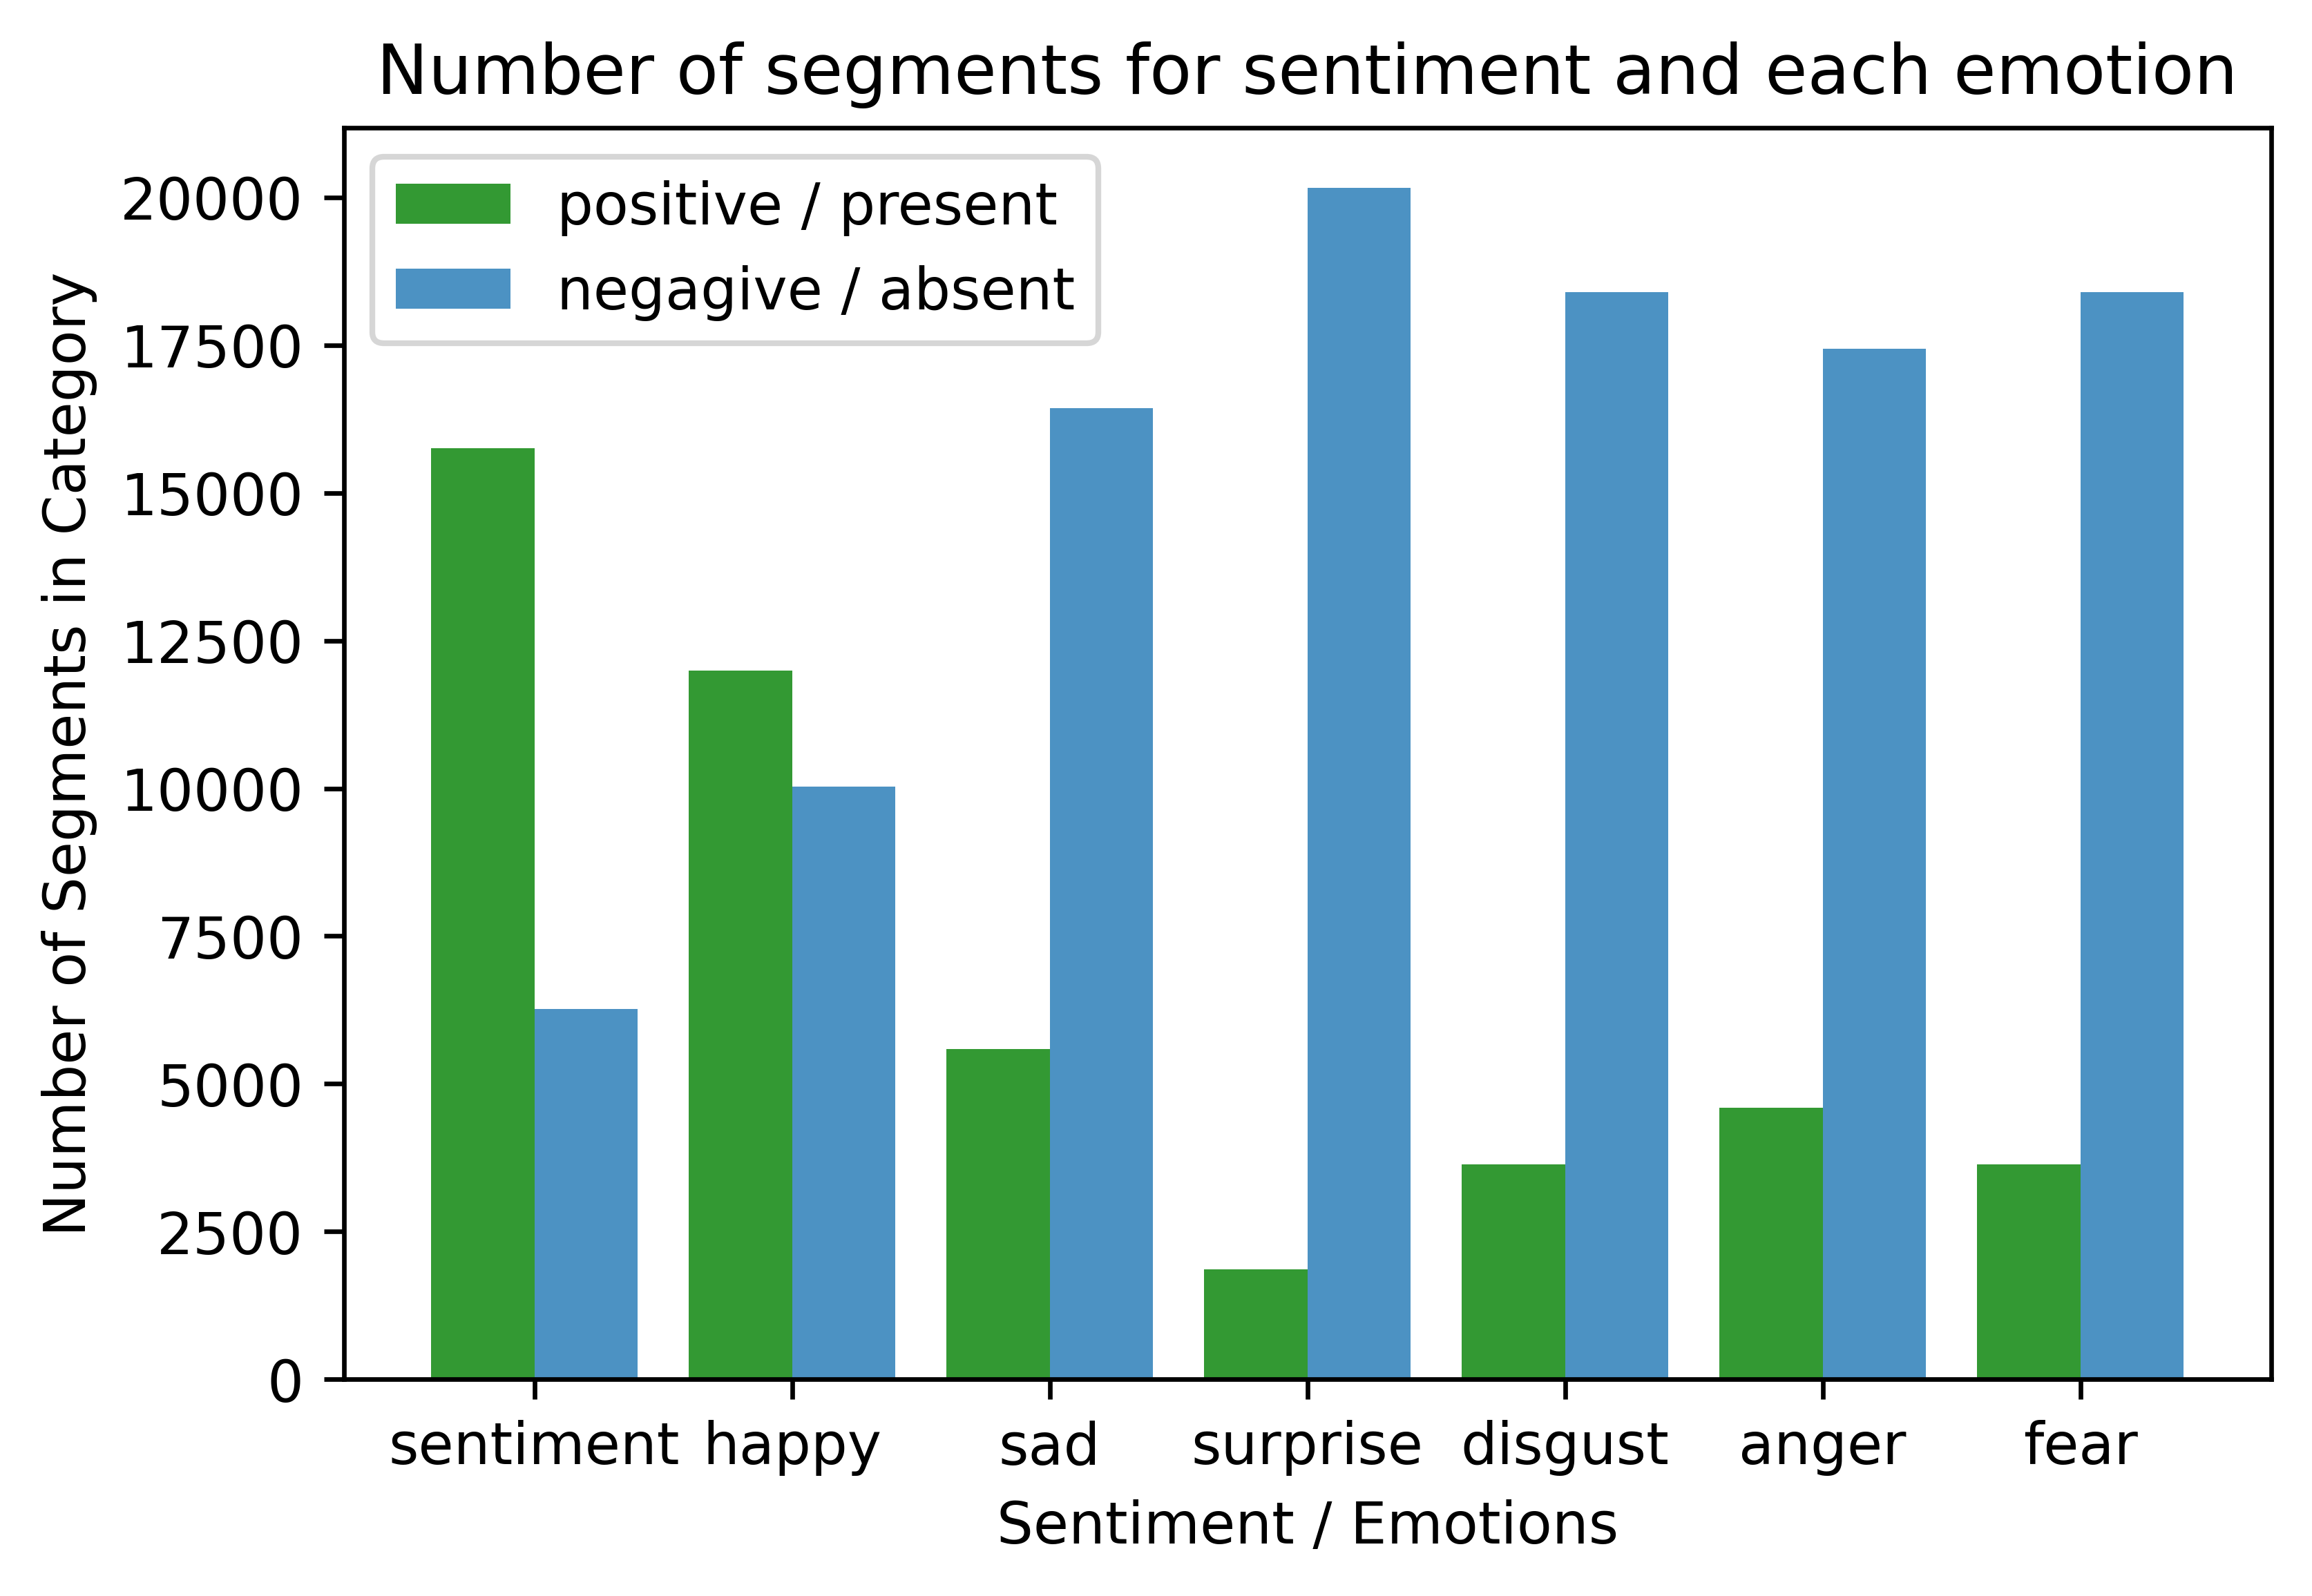

In [59]:
X = index_of.keys()

  
X_axis = np.arange(len(X))
figure = plt.figure(dpi=600) 
plt.bar(X_axis - 0.2, one, 0.4, label = 'positive / present', color = "g" , alpha = 0.8)
plt.bar(X_axis + 0.2, zero, 0.4, label = 'negagive / absent', alpha = 0.8)

plt.xticks(X_axis, X)
plt.xlabel("Sentiment / Emotions")
plt.ylabel("Number of Segments in Category")
plt.title("Number of segments for sentiment and each emotion")
plt.legend()
plt.show()

In [17]:
from nltk.tokenize import word_tokenize
from nltk.book import FreqDist

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [32]:
with open('data/counts_of_word.dict', 'rb') as f:
    frequ_dict = pickle.load(f)

In [14]:
def count_words(X):#, fdict):
    buf = StringIO()
    for key in X.ids:
        for sent in X.raw_sentences[key]:
            buf.write(sent + " ")

    text = buf.getvalue()
    new_text = text.split()
    fq = FreqDist(new_text)
    
    return fq
    '''
    perc = len(new_text)*0.8
    counter = 0
    most_common = []
    uncommon = []
    for key in fdict:
        
        
        if counter < perc:
            most_common.append(key)
            counter += fdict[key]
        
        elif fdict[key] > 0:
            uncommon.append(key)
        

    
    return most_common, uncommon
    '''
    #total number of words
    #count for each word
    #list most common (80%)
    #list most uncommon (20% of words)

In [15]:
replace_80= ol.DataLoad("./data/replace_80.pkl")

In [18]:
fq = count_words(replace_80)

In [23]:
fq2  = dict(fq)
fq2 = dict(sorted(fq.items(), key=lambda x:x[1], reverse=True))
type(fq2)

dict

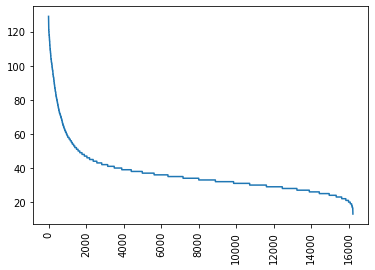

In [24]:
plt.plot(list(range(len(fq2.keys()))), list(fq2.values()))
plt.xticks(rotation=90)
plt.show();

In [74]:
#fq2 = dict(sorted(fq.items(), key=lambda x:x[1], reverse=True))
#type(fq2)

dict

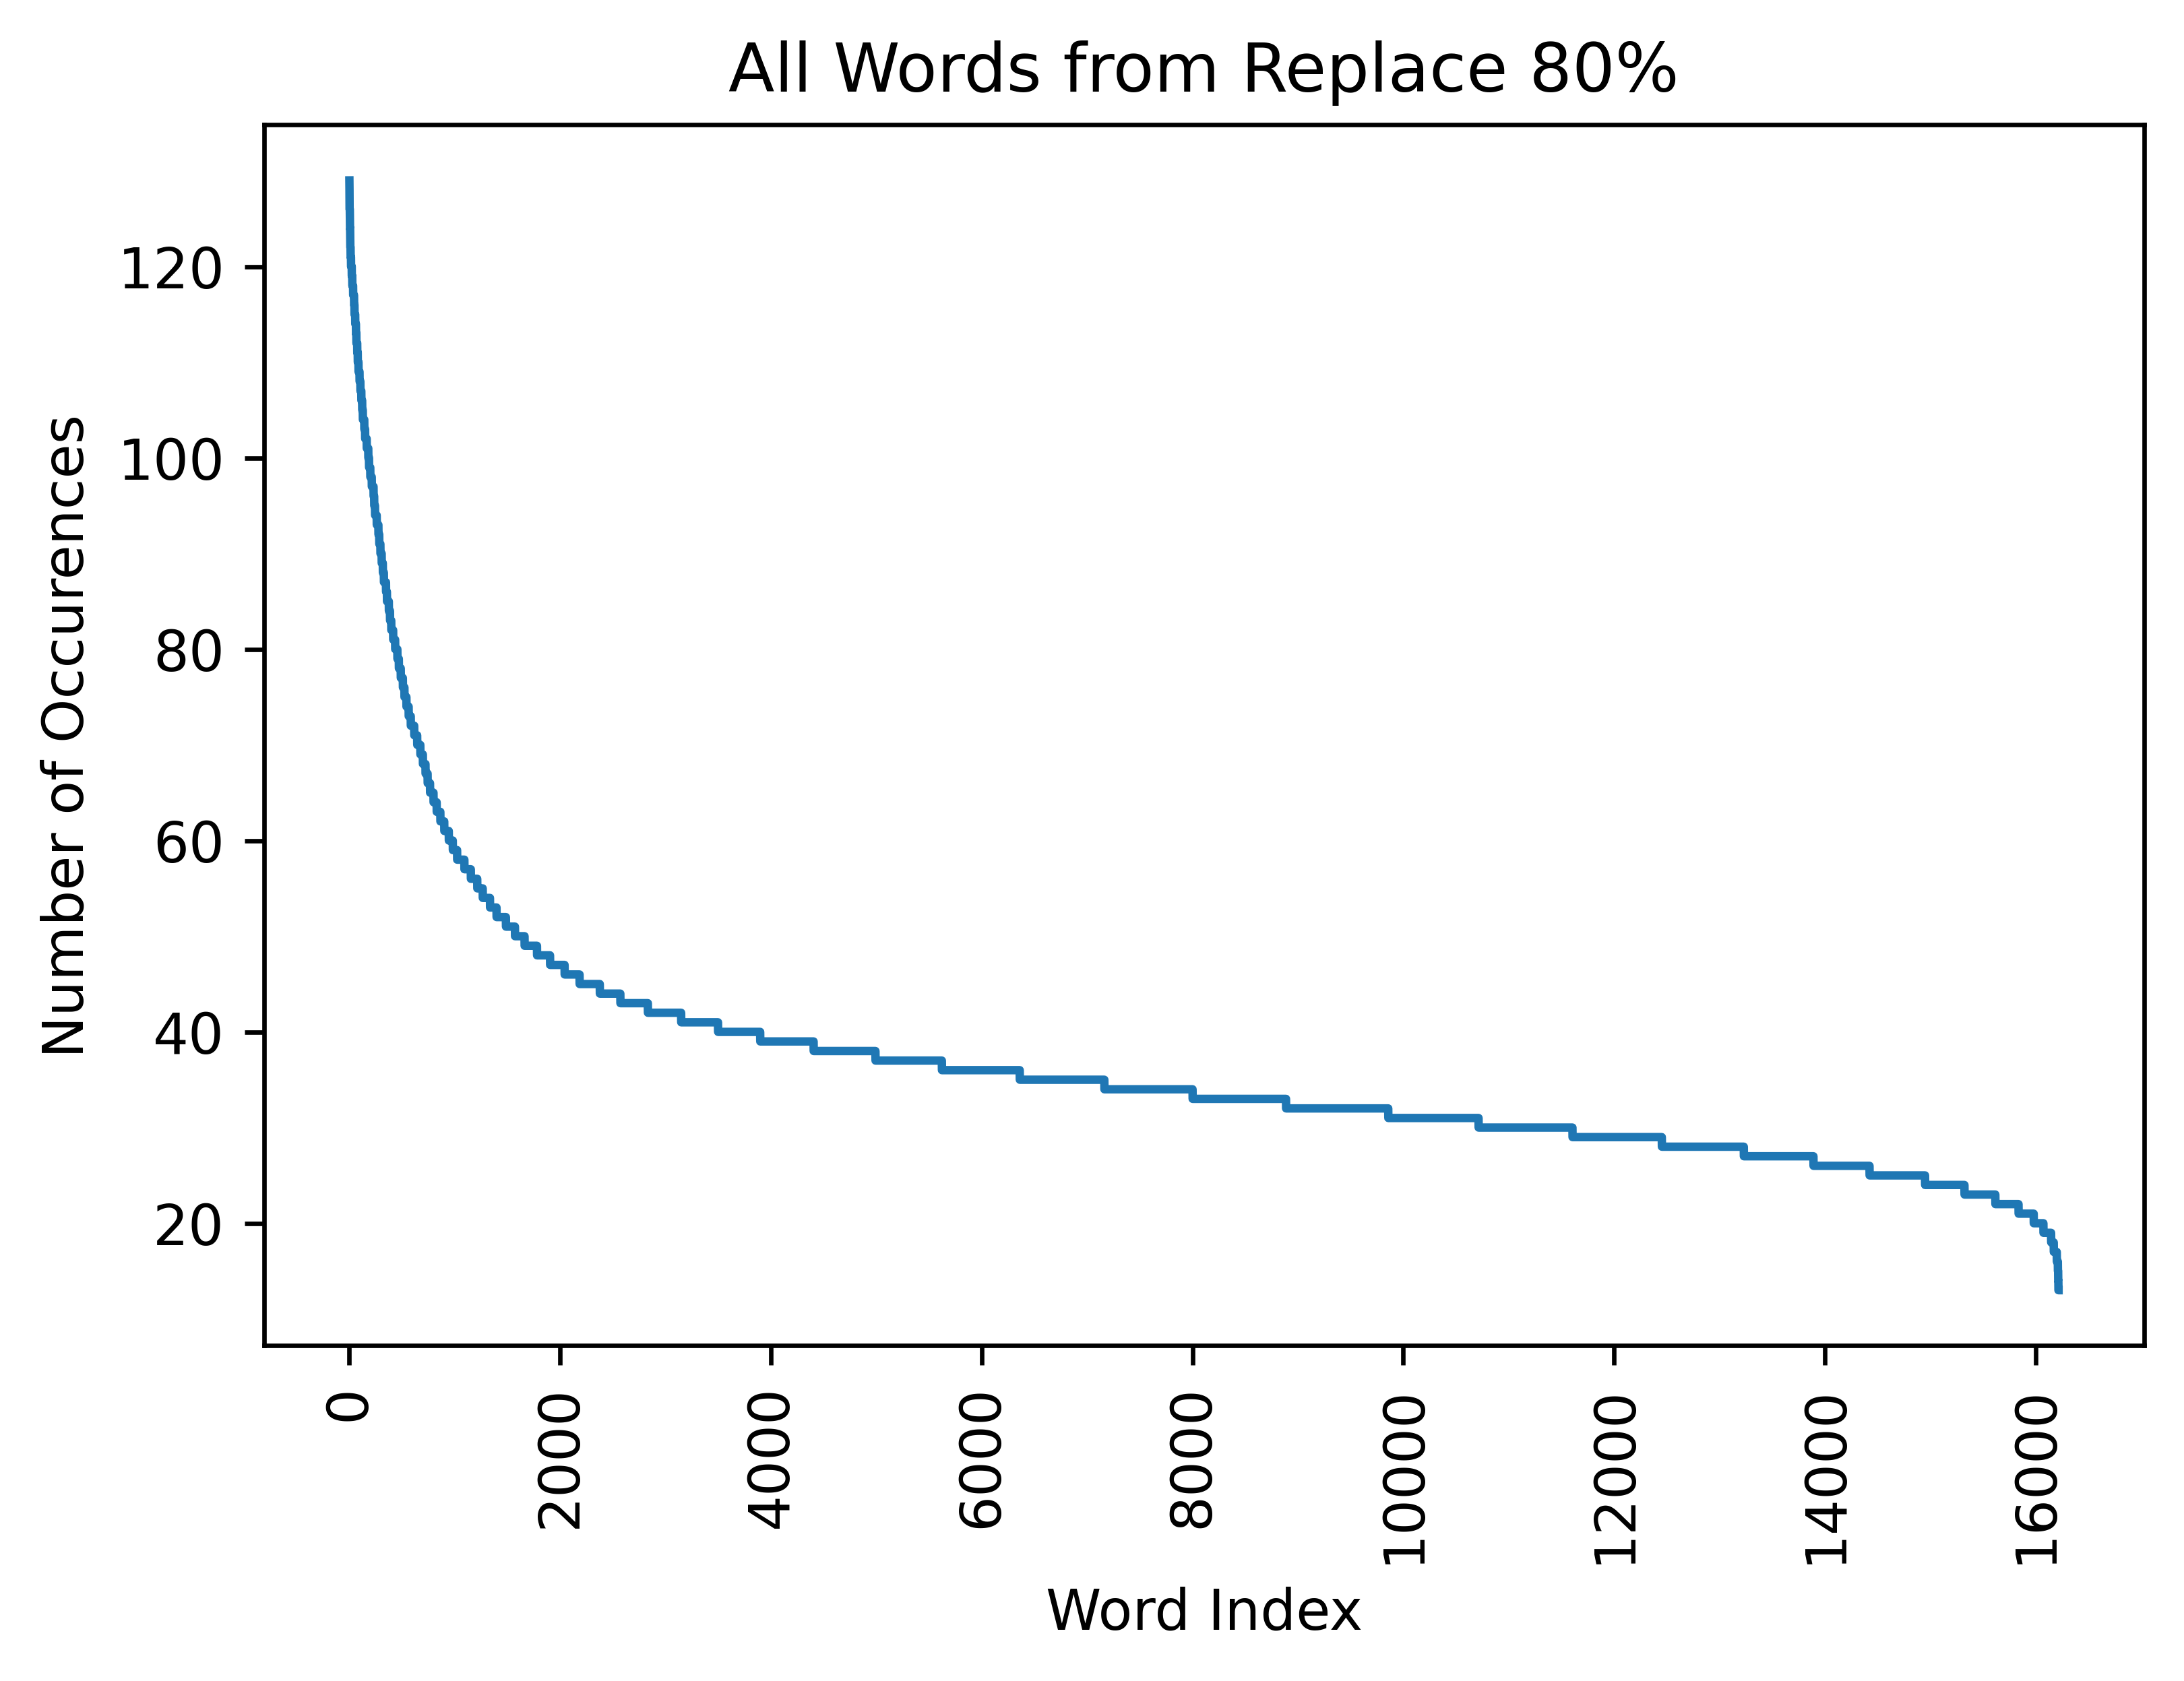

In [37]:
figure = plt.figure(dpi=600)
plt.plot(list(range(len(fq2.keys()))), list(fq2.values()))
plt.xticks(rotation=90)
plt.title("All Words from Replace 80%")
plt.ylabel("Number of Occurences")
plt.xlabel("Word Index")
plt.show();

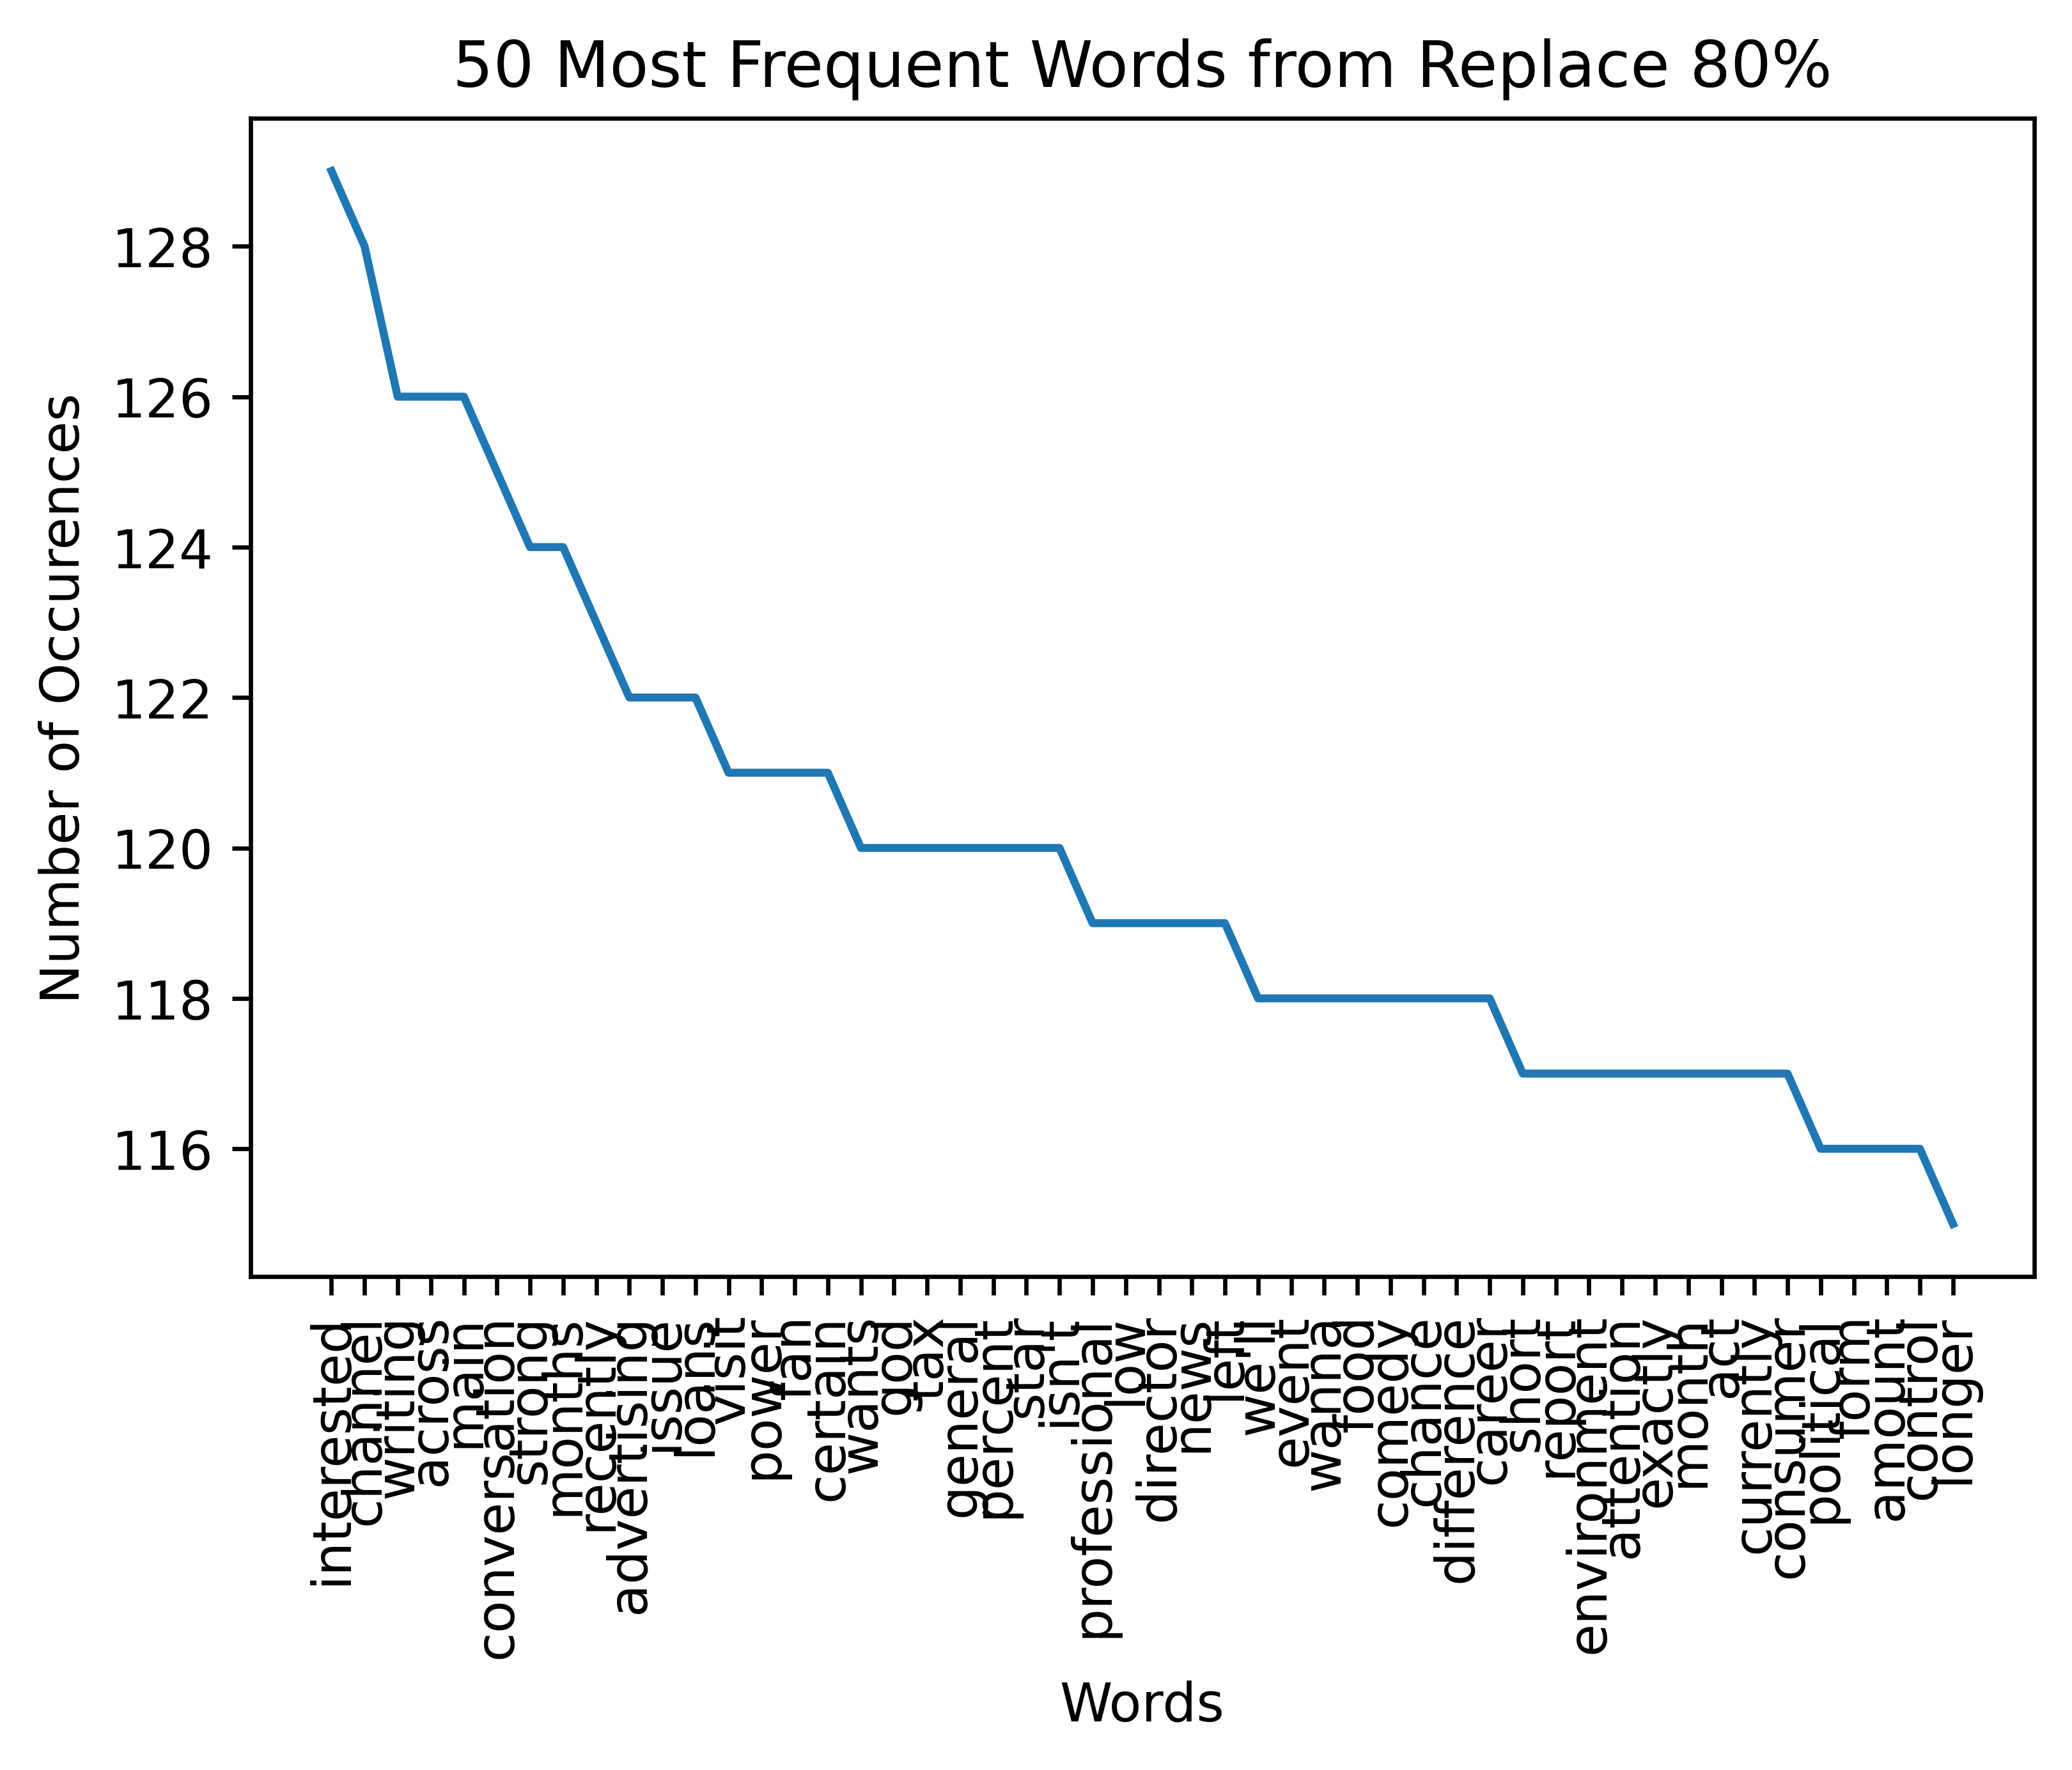

In [30]:
figure = plt.figure(dpi=600)
plt.plot(list((fq2.keys()))[:50], list(fq2.values())[:50])
plt.xticks(rotation=90)
plt.title("50 Most Frequent Words from Replace 80%")
plt.ylabel("Number of Occurences")
plt.xlabel("Words")
plt.show();

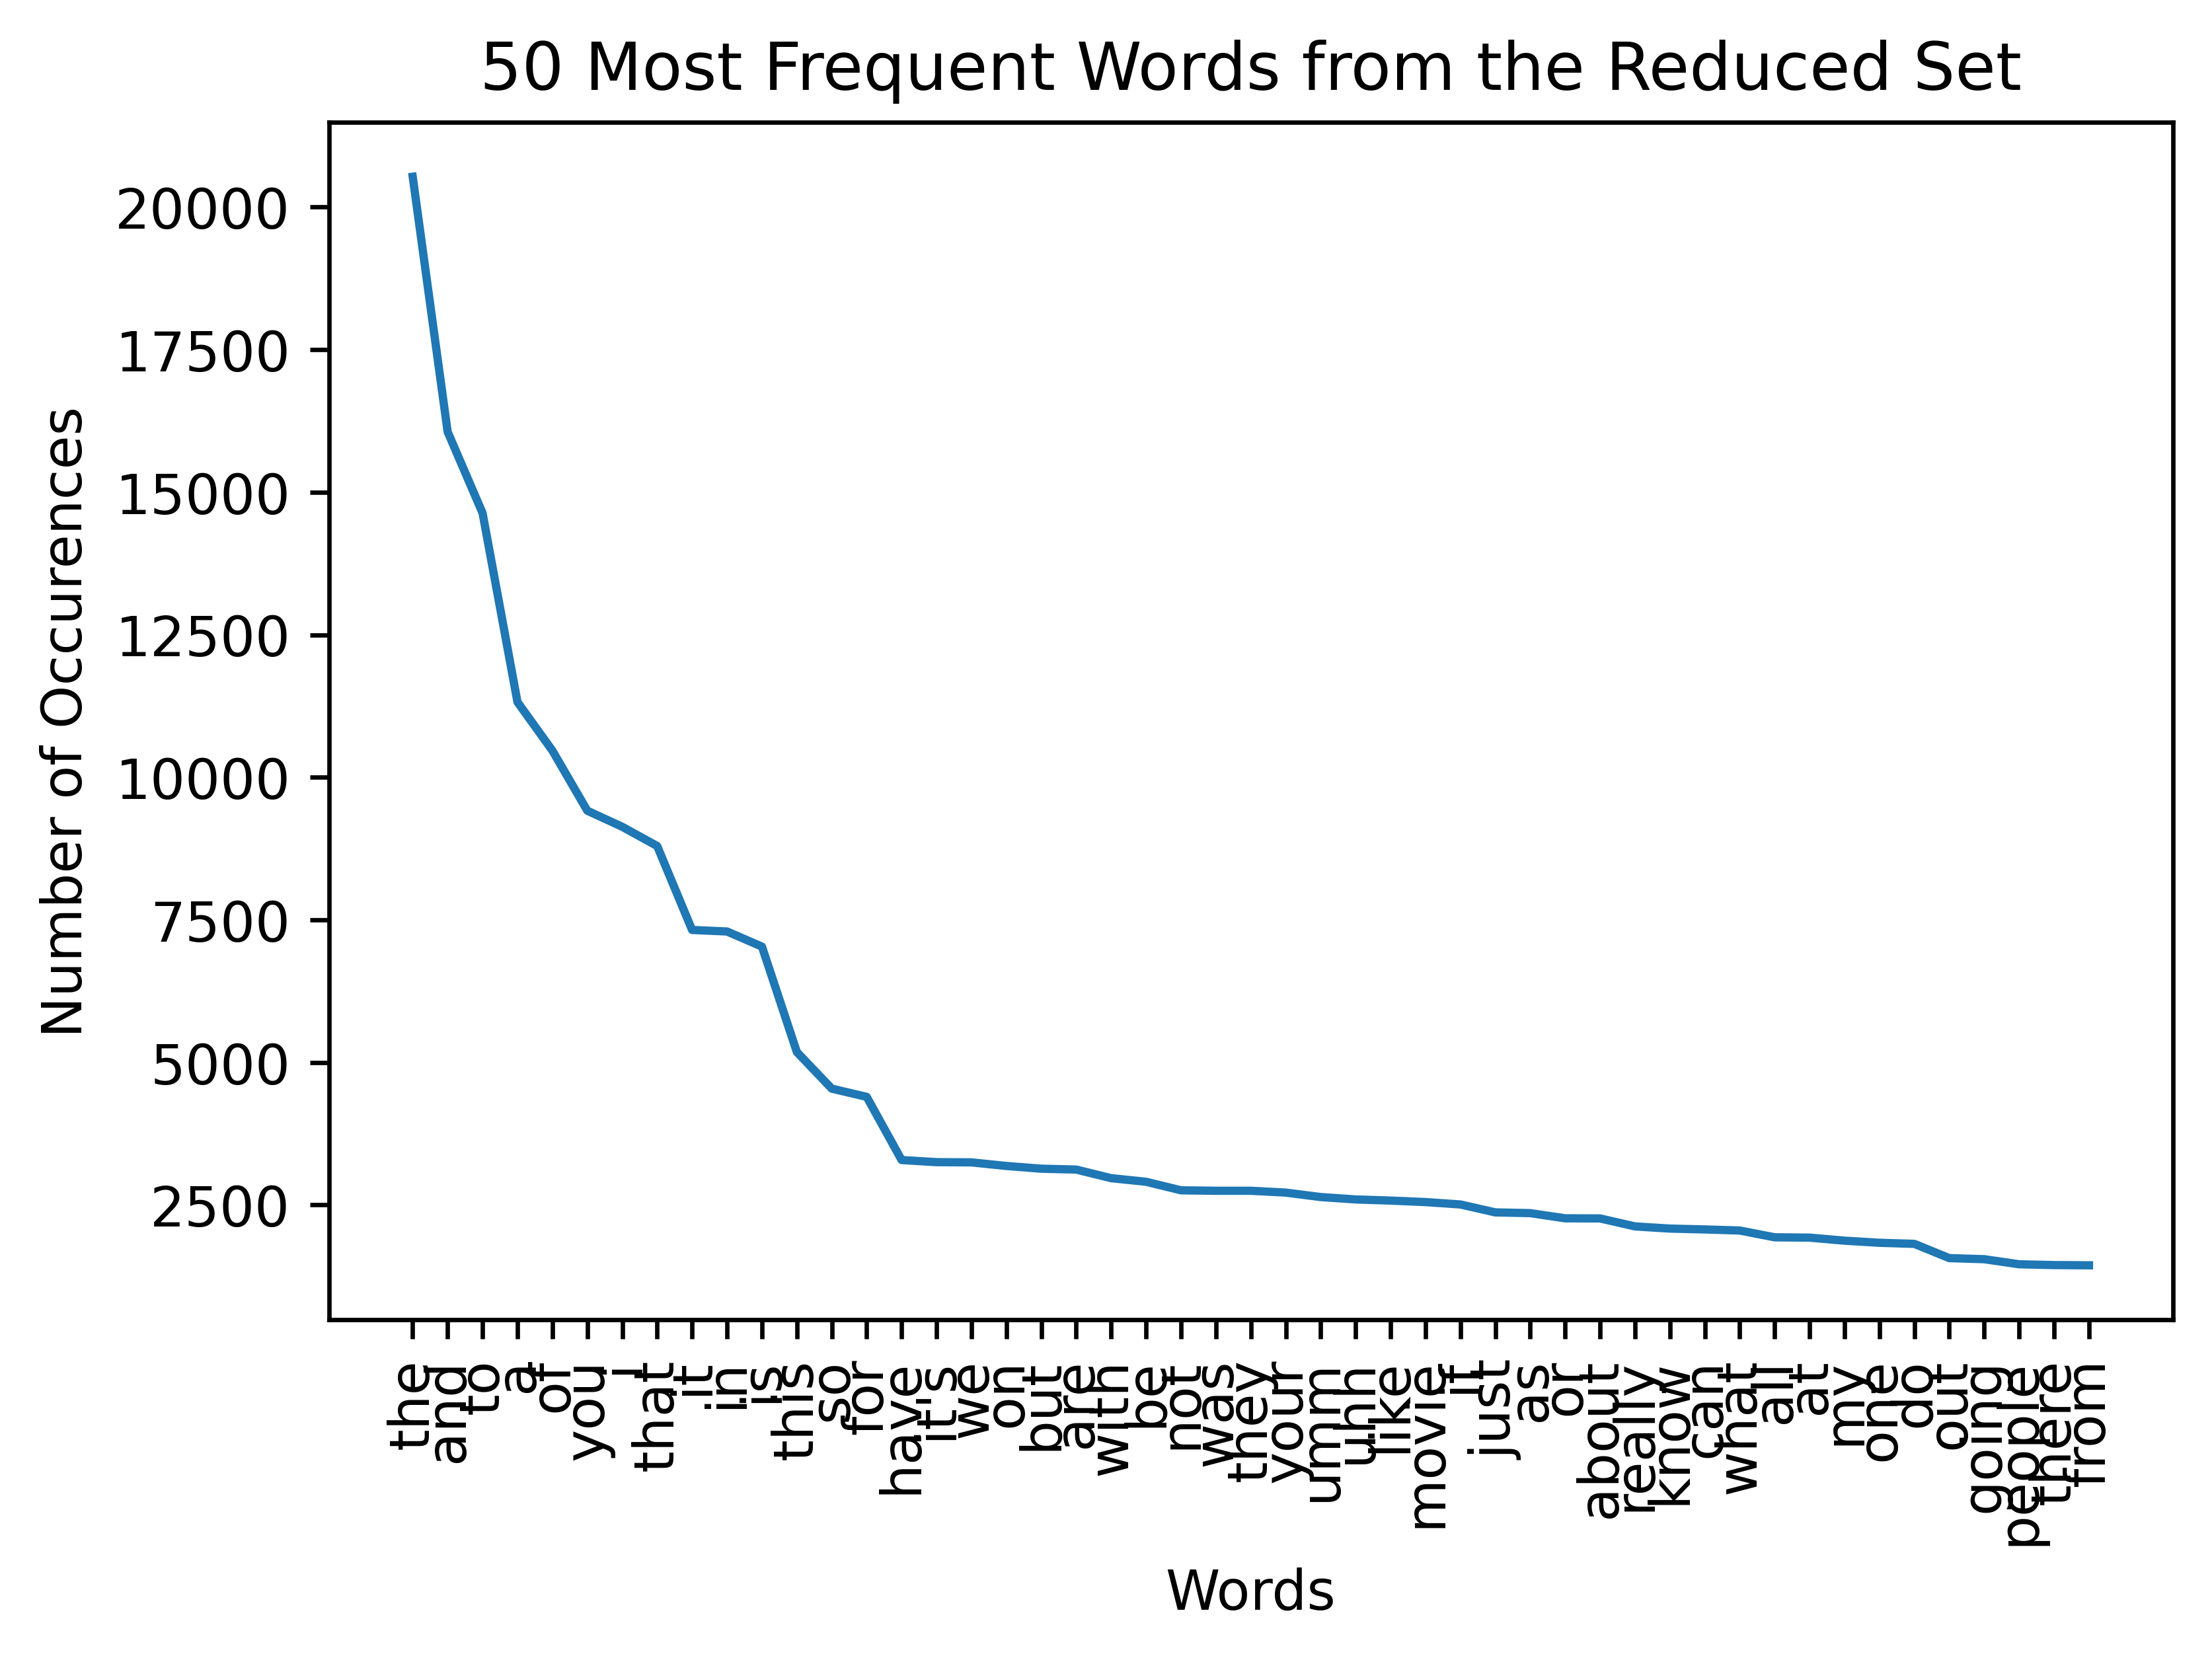

In [36]:
figure = plt.figure(dpi=600)
plt.plot(list((frequ_dict.keys()))[1:50], list(frequ_dict.values())[1:50])
plt.xticks(rotation=90)
plt.title("50 Most Frequent Words from the Reduced Set")
plt.ylabel("Number of Occurences")
plt.xlabel("Words")
plt.show();

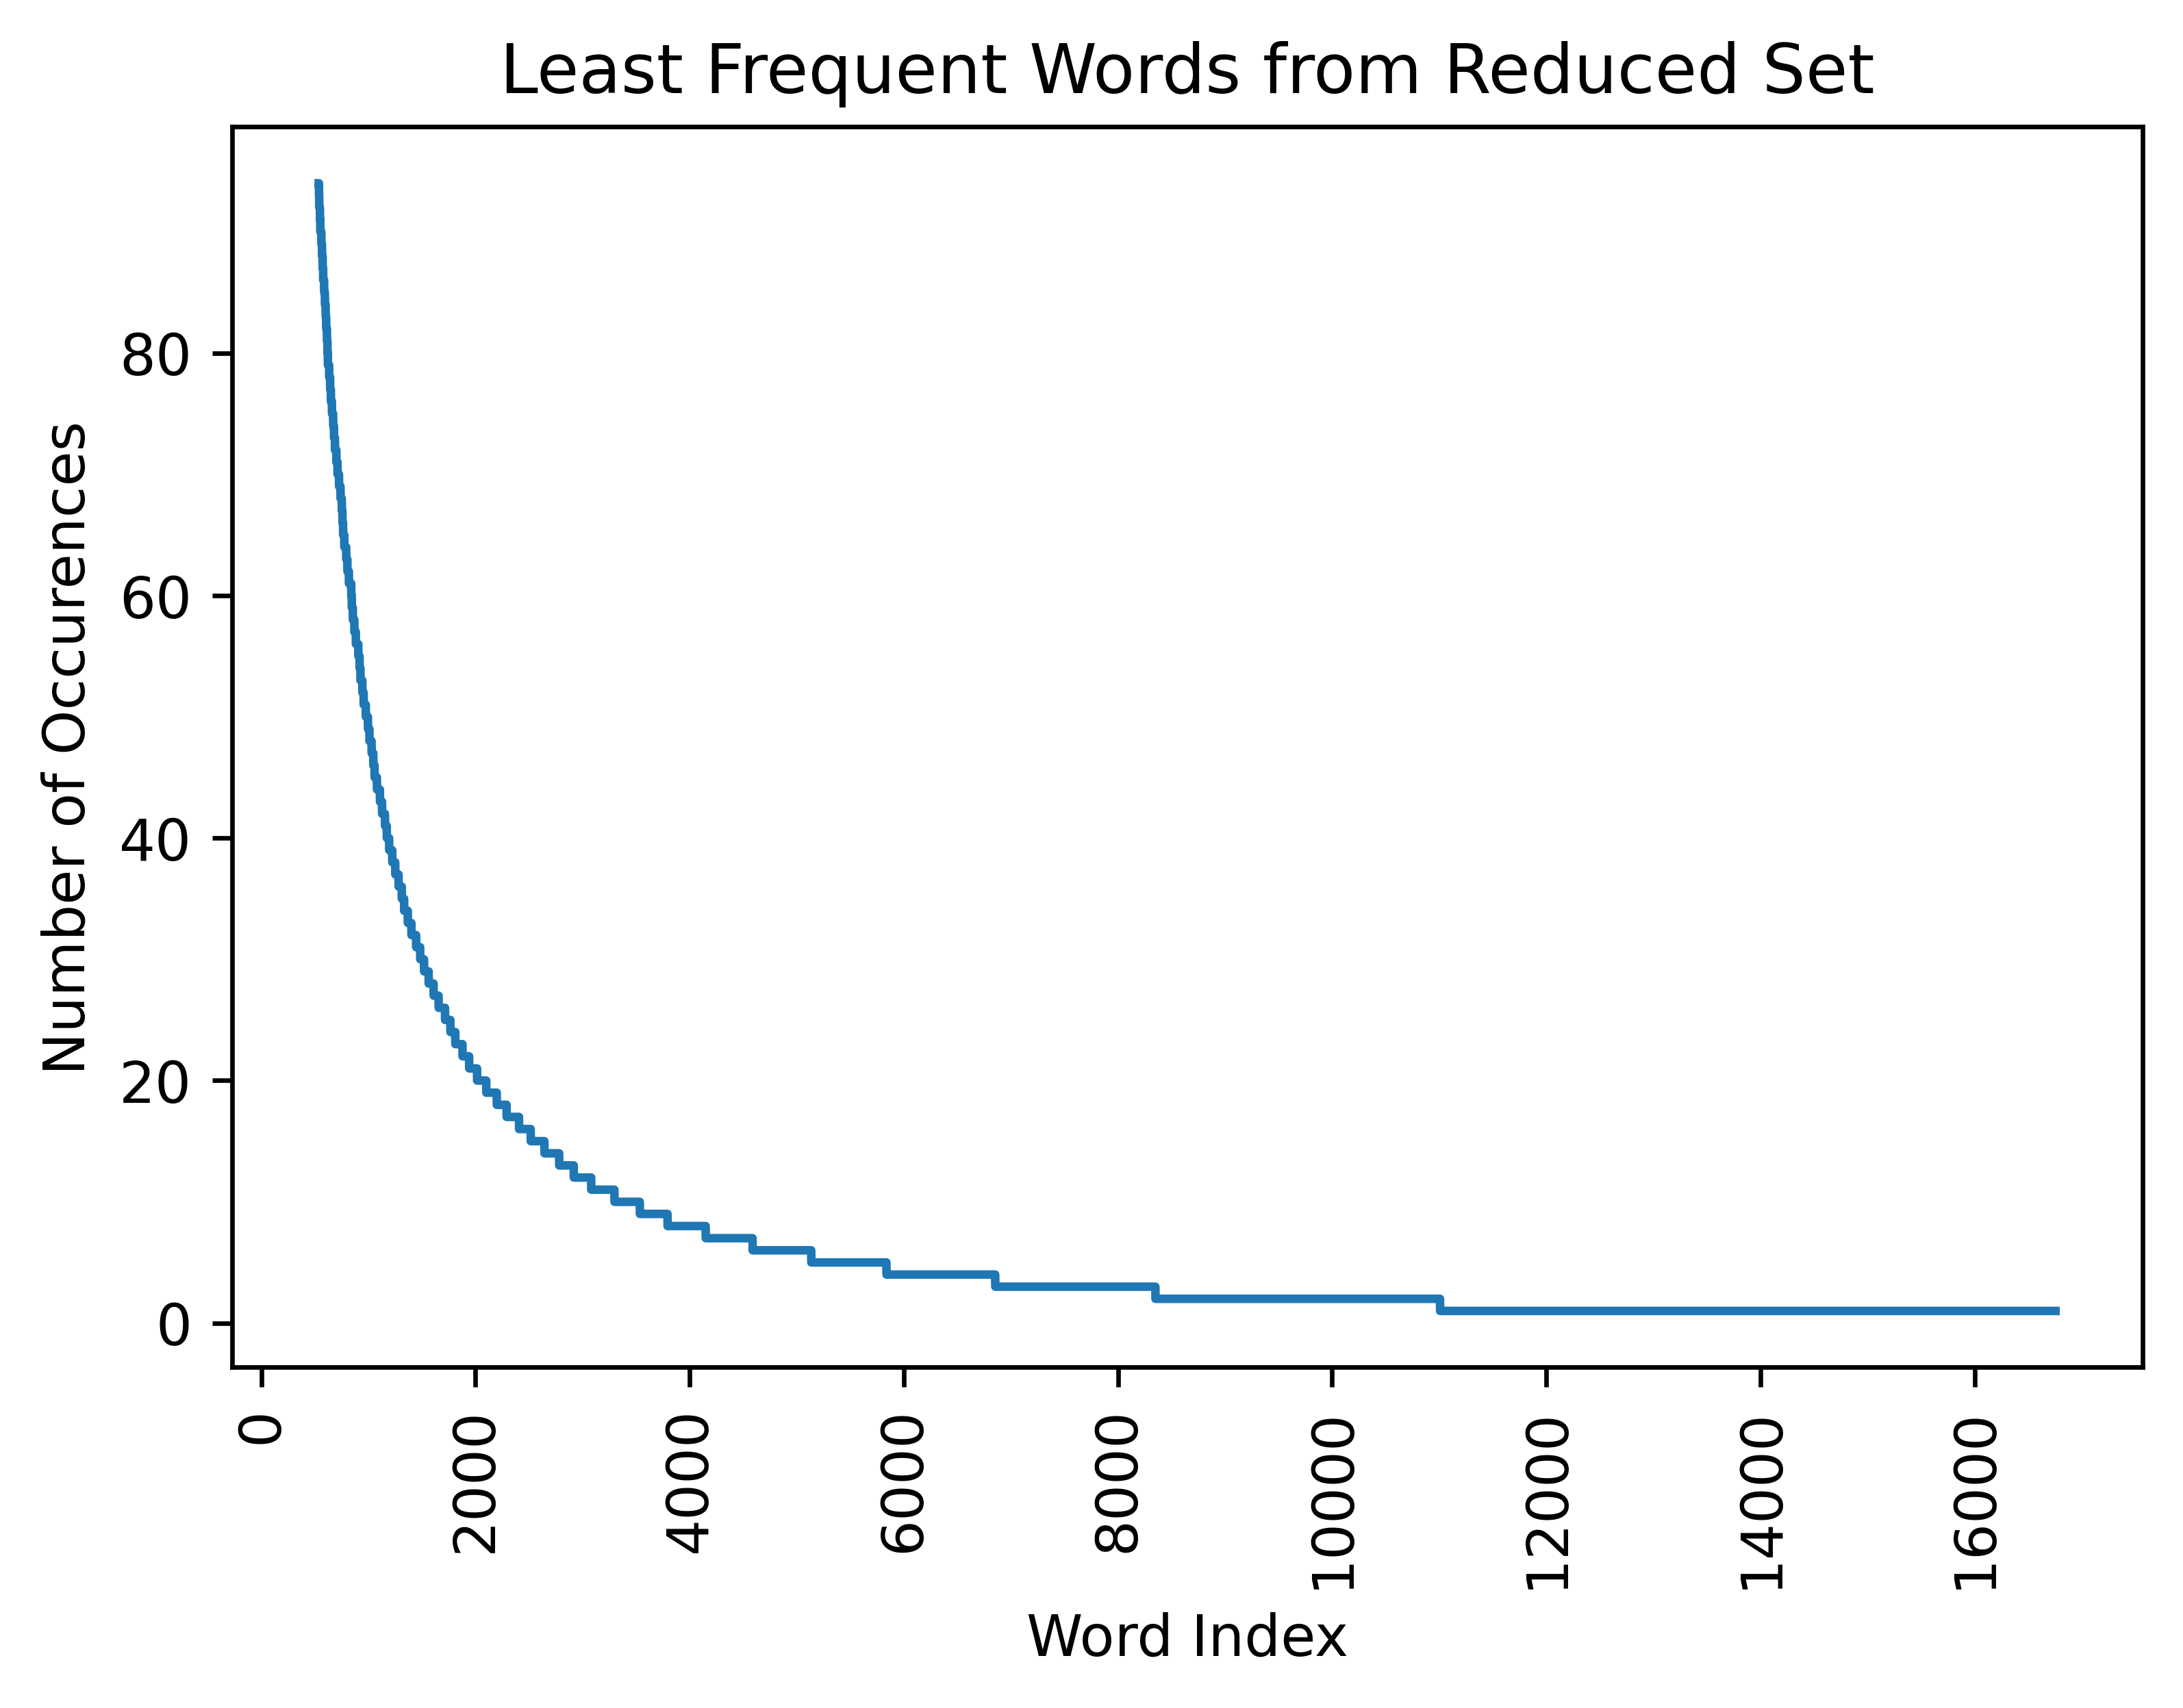

In [48]:
figure = plt.figure(dpi=600)
plt.plot(list(range(537, len(frequ_dict.keys()))), list(frequ_dict.values())[537:])
plt.xticks(rotation=90)
plt.title("Least Frequent Words from Reduced Set")
plt.ylabel("Number of Occurences")
plt.xlabel("Word Index")
plt.show();

In [134]:
mc, uc = count_words(train, frequ_dict)

In [135]:
len(mc) , len(uc),len(frequ_dict.keys()), len(embedding_dict.keys())

(537, 16220, 16757, 16823)

In [187]:
def replace_most_common(X, worddict, most_common, uncommon):
    new_embedding = defaultdict(list)
    raw = defaultdict(list)
    #wordlist = np.array(list(worddict.keys()))
    lenght_u = len(uncommon)
    
    
    for key in X.ids:
        
        
        for sent in  X.raw_sentences[key]:
            sentsplit = sent.split()
                        
            new_sent_embed = np.zeros((len(sentsplit), 300))
            
            for i, word in enumerate(sentsplit):
                
                if word in most_common:
                    new_word = uncommon[np.random.randint(0, lenght_u)]
                    #print(new_word)
                    #print(sentsplit[i])
                    sentsplit[i] = new_word
                    #print(sentsplit[i], new_word)
                    new_sent_embed[i] = worddict[new_word]
                
                else:
                    new_sent_embed[i] = worddict[word]
                    
            
            raw[key].append(sentsplit)
            new_embedding[key].append(new_sent_embed)
            
            
        
            
        
    return raw, new_embedding

In [188]:
r4, e4 =  replace_most_common(train, embedding_dict, mc, uc)

for key in e4:
    print(key)
    print(r4[key][0])
    print(train.raw_sentences[key][0])
    print(e4[key][0].shape)
    break

--qXJuDtHPw
['writer', 'georgia', 'cop', 'stirling', 'dignified', 'uninformed', 'writer', 'knocked', 'somebody', 'stylize', 'beast', 'warrant', 'incredible', 'command', 'emphasize', 'mechanics', 'chiropractors', 'appalled', 'anywhere', 'english', 'sickly', 'spoken']
writer sp i see that a writer is somebody who has an incredible command of mechanics sp of the english language sp
(22, 300)


In [189]:
new_r4, new_e4 = get_sent_embedings(e4, r4)


In [190]:
len(new_r2.keys()), len(new_r4.keys())

(3281, 3281)

In [191]:
export_data("replace_80", (train.ids, train.speakers, train.all_labels, new_e4, train.audio, train.visual,
            new_r4, train.trains_index, train.tests_index))

In [192]:
rand_80 = ol.DataLoad("./data/replace_80.pkl")

In [193]:
for emo in index_of:
    label = get_emotion_label_dict(emo, rand.all_labels)
    export_data("replace_80_"+ emo, (rand.ids, rand.speakers, label, rand.embeddings , rand.audio, rand.visual,
            rand.raw_sentences, rand.trains_index, rand.tests_index))

In [81]:
replace_80 = ol.DataLoad("./data/replace_80.pkl")

['k8yDywC4gt8' 'kCQqLNiO0mk' 'kDyK9VGfLW8' 'kI6jzM_aLGs' 'kKMfsWrigTE']


In [82]:
for key in train.ids:
    if key in train.trains_index:
        
        train.embeddings[key] = replace_80.embeddings[key]
        train.raw_sentences[key] = replace_80.raw_sentences[key]
        

In [87]:
for key in train.ids:
    if key in train.trains_index:
        print(train.raw_sentences[key])
        break

['writer georgia cop stirling dignified uninformed writer knocked somebody stylize beast warrant incredible command emphasize mechanics chiropractors appalled anywhere english sickly spoken']


In [27]:
for emo in index_of:
    label = get_emotion_label_dict(emo, train.all_labels)
    export_data("replace_train_"+ emo, (train.ids, train.speakers, label, train.embeddings , train.audio, train.visual,
            train.raw_sentences, train.trains_index, train.tests_index))

In [85]:
export_data("replace_train", (train.ids, train.speakers, train.all_labels, train.embeddings , train.audio, train.visual,
            train.raw_sentences, train.trains_index, train.tests_index))

In [88]:
frequ_dict['somebody']

86